In [4]:

import os
import sys
sys.path.append('.')
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import incense
from incense import ExperimentLoader

def get_mongo_uri():
    in_devcontainer = (
        os.environ.get("TERM_PROGRAM") == "vscode"
        or os.environ.get("HOME") == "/home/vscode"
        or (os.environ.get("PATH") or "").startswith("/home/vscode")
    )
    if in_devcontainer:
        return "mongodb://mongo:27017"
    else:
        return None


In [7]:
loader = ExperimentLoader(
    mongo_uri=get_mongo_uri(), 
    db_name='sacred'
)

## find by ID 

In [9]:
exp = loader.find_by_id(11085)
exp

Experiment(id=11085, name=qE_calib)

## find by query

In [19]:
loader.find_by_config_key('length_SP', 1000)


QuerySet([Experiment(id=1044, name=Ek_video), Experiment(id=1045, name=Ek_video), Experiment(id=1046, name=Ek_video), Experiment(id=1048, name=Ek_video), Experiment(id=1049, name=Ek_video), Experiment(id=1050, name=Ek_video), Experiment(id=1107, name=Ek_video), Experiment(id=1110, name=Ek_video), Experiment(id=1111, name=Ek_video)])

In [23]:
query = {"$and": [
            {"config.length_SP": 200},
            {"config.limit_blue": 25},
        ]}
loader.find(query)


QuerySet([Experiment(id=87, name=IBPC_pulse), Experiment(id=88, name=IBPC_pulse), Experiment(id=89, name=IBPC_pulse), Experiment(id=90, name=IBPC_pulse), Experiment(id=6850, name=OJIP_pulse), Experiment(id=6870, name=OJIP_pulse), Experiment(id=8996, name=OJIP_pulse), Experiment(id=8997, name=OJIP_pulse), Experiment(id=8998, name=OJIP_pulse), Experiment(id=8999, name=OJIP_pulse), Experiment(id=9000, name=OJIP_pulse), Experiment(id=9001, name=OJIP_pulse), Experiment(id=9002, name=OJIP_pulse), Experiment(id=9003, name=OJIP_pulse), Experiment(id=9004, name=OJIP_pulse)])

In [24]:
loader.cache_clear()
exp = loader.find_by_id(11085)
exp.to_dict()

{'_id': 11085,
 'command': 'send_IBPC',
 'heartbeat': datetime.datetime(2022, 4, 6, 11, 38, 0, 4000),
 'format': 'MongoObserver-0.7.0',
 'status': 'COMPLETED',
 'resources': [],
 'omniboard': {'tags': ['stt7', 'scl1']},
 'host': {'gpus': {'driver_version': '456.71',
   'gpus': [{'persistence_mode': False,
     'total_memory': 6144,
     'model': 'GeForce GTX 1660 Ti'}]},
  'cpu': 'Unknown',
  'os': ['Windows', 'Windows-10-10.0.19044-SP0'],
  'python_version': '3.8.10',
  'ENV': {},
  'hostname': 'AlienPC'},
 'captured_out': 'Device List Built successfully...\nNumber of devices = 1\nWheel already in position\nVoltage = 38.773766289254425\nWheel already in position\nCommand: d[7,0,15,1,0,0,20,1]\n#d[7,0,15,1,0,0,20,1]:xxxx\r\n\nReply: #d[0]:004d\n[0]\nCommand: d[10,260,0,1000,0,1000,0,1]\n#d[10,260,0,1000,0,1000,0,1]:xxxx\r\n\nReply: #d[0]:004d\n[0]\nCommand: m[11,250,0,20,0,0,200,0]\n#m[11,250,0,20,0,0,200,0]:xxxx\r\n\nReply: #m[0]:0078\n[0]\n118\nBinning factor: 1\nx:0, y:0, height:193

## Read how the experiment went

In [25]:
print(exp.captured_out)


Device List Built successfully...
Number of devices = 1
Wheel already in position
Voltage = 38.773766289254425
Wheel already in position
Command: d[7,0,15,1,0,0,20,1]
#d[7,0,15,1,0,0,20,1]:xxxx

Reply: #d[0]:004d
[0]
Command: d[10,260,0,1000,0,1000,0,1]
#d[10,260,0,1000,0,1000,0,1]:xxxx

Reply: #d[0]:004d
[0]
Command: m[11,250,0,20,0,0,200,0]
#m[11,250,0,20,0,0,200,0]:xxxx

Reply: #m[0]:0078
[0]
118
Binning factor: 1
x:0, y:0, height:1936, width:1216
DELAY µs: 15
FR: 0.9999978378425127
EXP: 169.9921083783784
FR: 70
x:0, y:0, height:1936, width:1216
Command: b
#b:xxxx

Reply: #b[0]:0081
[0]
im stopping thread right now. Num frames: 2052
Command: e
#e:xxxx

Reply: #e[0]:0092
[0]
Added image/png as content-type of artifact G:\DREAM\from_github\PAMFluo\Experiments\2022-04-06_13_02_qE_calib\2022-04-06_13_37_fluorescence_selectively.png.
Added text/csv as content-type of artifact G:\DREAM\from_github\PAMFluo\Experiments\2022-04-06_13_02_qE_calib\2022-04-06_13_37_fluorescence_selectively.csv.

## config

In [26]:
exp.config


pmap({'limit_blue': 40, 'period_SP': 20000, 'seed': 421683101, 'name': 'qE_calib', 'limit_blue_high': 450, 'limit_OJIP': 250, 'actinic_filter': 1, 'limit_red': 0, 'acq_time': 2052, 'length_ML': 3, 'period_ML': 250, 'periods': 1, 'exposure': 170, 'pulses': pmap({'step_delay': 1500, 'amplitude_diff': 1, 'average_window': 100}), 'gain': 70, 'move_plate': False, 'trigger_color': 'no_LED_trig', 'sample_rate': 100.0, 'camera_heat_delay': 250, 'HL_time': 15, 'limit_green': 50, 'length_SP': 200, 'limit_blue_low': 0, 'limit_purple': 150, 'start_and_stop': pmap({'initial_filter': 1, 'port_filter_wheel': 'COM3', 'x': 0, 'port_motors': 'COM6', 'subsampling_factor': 1, 'height': 1936, 'clock': 118, 'trigger': True, 'trigger_frequency': 1, 'binning_factor': 1, 'port_arduino': 'COM4', 'port_DC4100': 'COM5', 'y': 0, 'width': 1216, 'gain': 100})})

## Access data files

In [32]:
keys = list(exp.artifacts.keys())
exp.artifacts

{'2022-04-06_13_37_fluorescence_selectively.png': ImageArtifact(name=2022-04-06_13_37_fluorescence_selectively.png),
 '2022-04-06_13_37_fluorescence_selectively.csv': CSVArtifact(name=2022-04-06_13_37_fluorescence_selectively.csv),
 '2022-04-06_13_37_qE_calib.png': ImageArtifact(name=2022-04-06_13_37_qE_calib.png),
 '2022-04-06_13_37_qE_calib.csv': CSVArtifact(name=2022-04-06_13_37_qE_calib.csv),
 '2022-04-06_13_37_Segmentation reference.png': ImageArtifact(name=2022-04-06_13_37_Segmentation reference.png),
 '2022-04-06_13_37_local_maxima.png': ImageArtifact(name=2022-04-06_13_37_local_maxima.png),
 '2022-04-06_13_37_watershed.png': ImageArtifact(name=2022-04-06_13_37_watershed.png),
 '2022-04-06_13_37_result_segmentation.png': ImageArtifact(name=2022-04-06_13_37_result_segmentation.png)}

In [42]:
exp.artifacts[keys[3]].render()


,Unnamed: 0,pulse number pulse_mean,voltage pulse_mean,pulse number pulse_std,voltage pulse_std,pulse number blank_mean,voltage blank_mean,pulse number blank_std,voltage blank_std,pulse number intensity_mean,voltage intensity_mean,pulse number intensity_std,voltage intensity_std
0,0,0,0.0,0,0.0,0,-0.000537,0,0.000789,0,0.101629,0,0.011635
1,1,1,0.0,1,0.0,1,-0.000581,1,0.000650,1,0.101334,1,0.012225
2,2,2,0.0,2,0.0,2,-0.000531,2,0.000640,2,0.100810,2,0.012222
3,3,3,0.0,3,0.0,3,-0.000538,3,0.000653,3,0.100568,3,0.011780
4,4,4,0.0,4,0.0,4,-0.000540,4,0.000703,4,0.100758,4,0.011666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,85,0.0,85,0.0,85,-0.000471,85,0.000619,85,-0.000016,85,0.000986
86,86,86,0.0,86,0.0,86,-0.000498,86,0.000590,86,-0.000066,86,0.000982
87,87,87,0.0,87,0.0,87,-0.000456,87,0.000573,87,-0.000027,87,0.000895
88,88,88,0.0,88,0.0,88,-0.000474,88,0.000551,88,-0.000033,88,0.000937


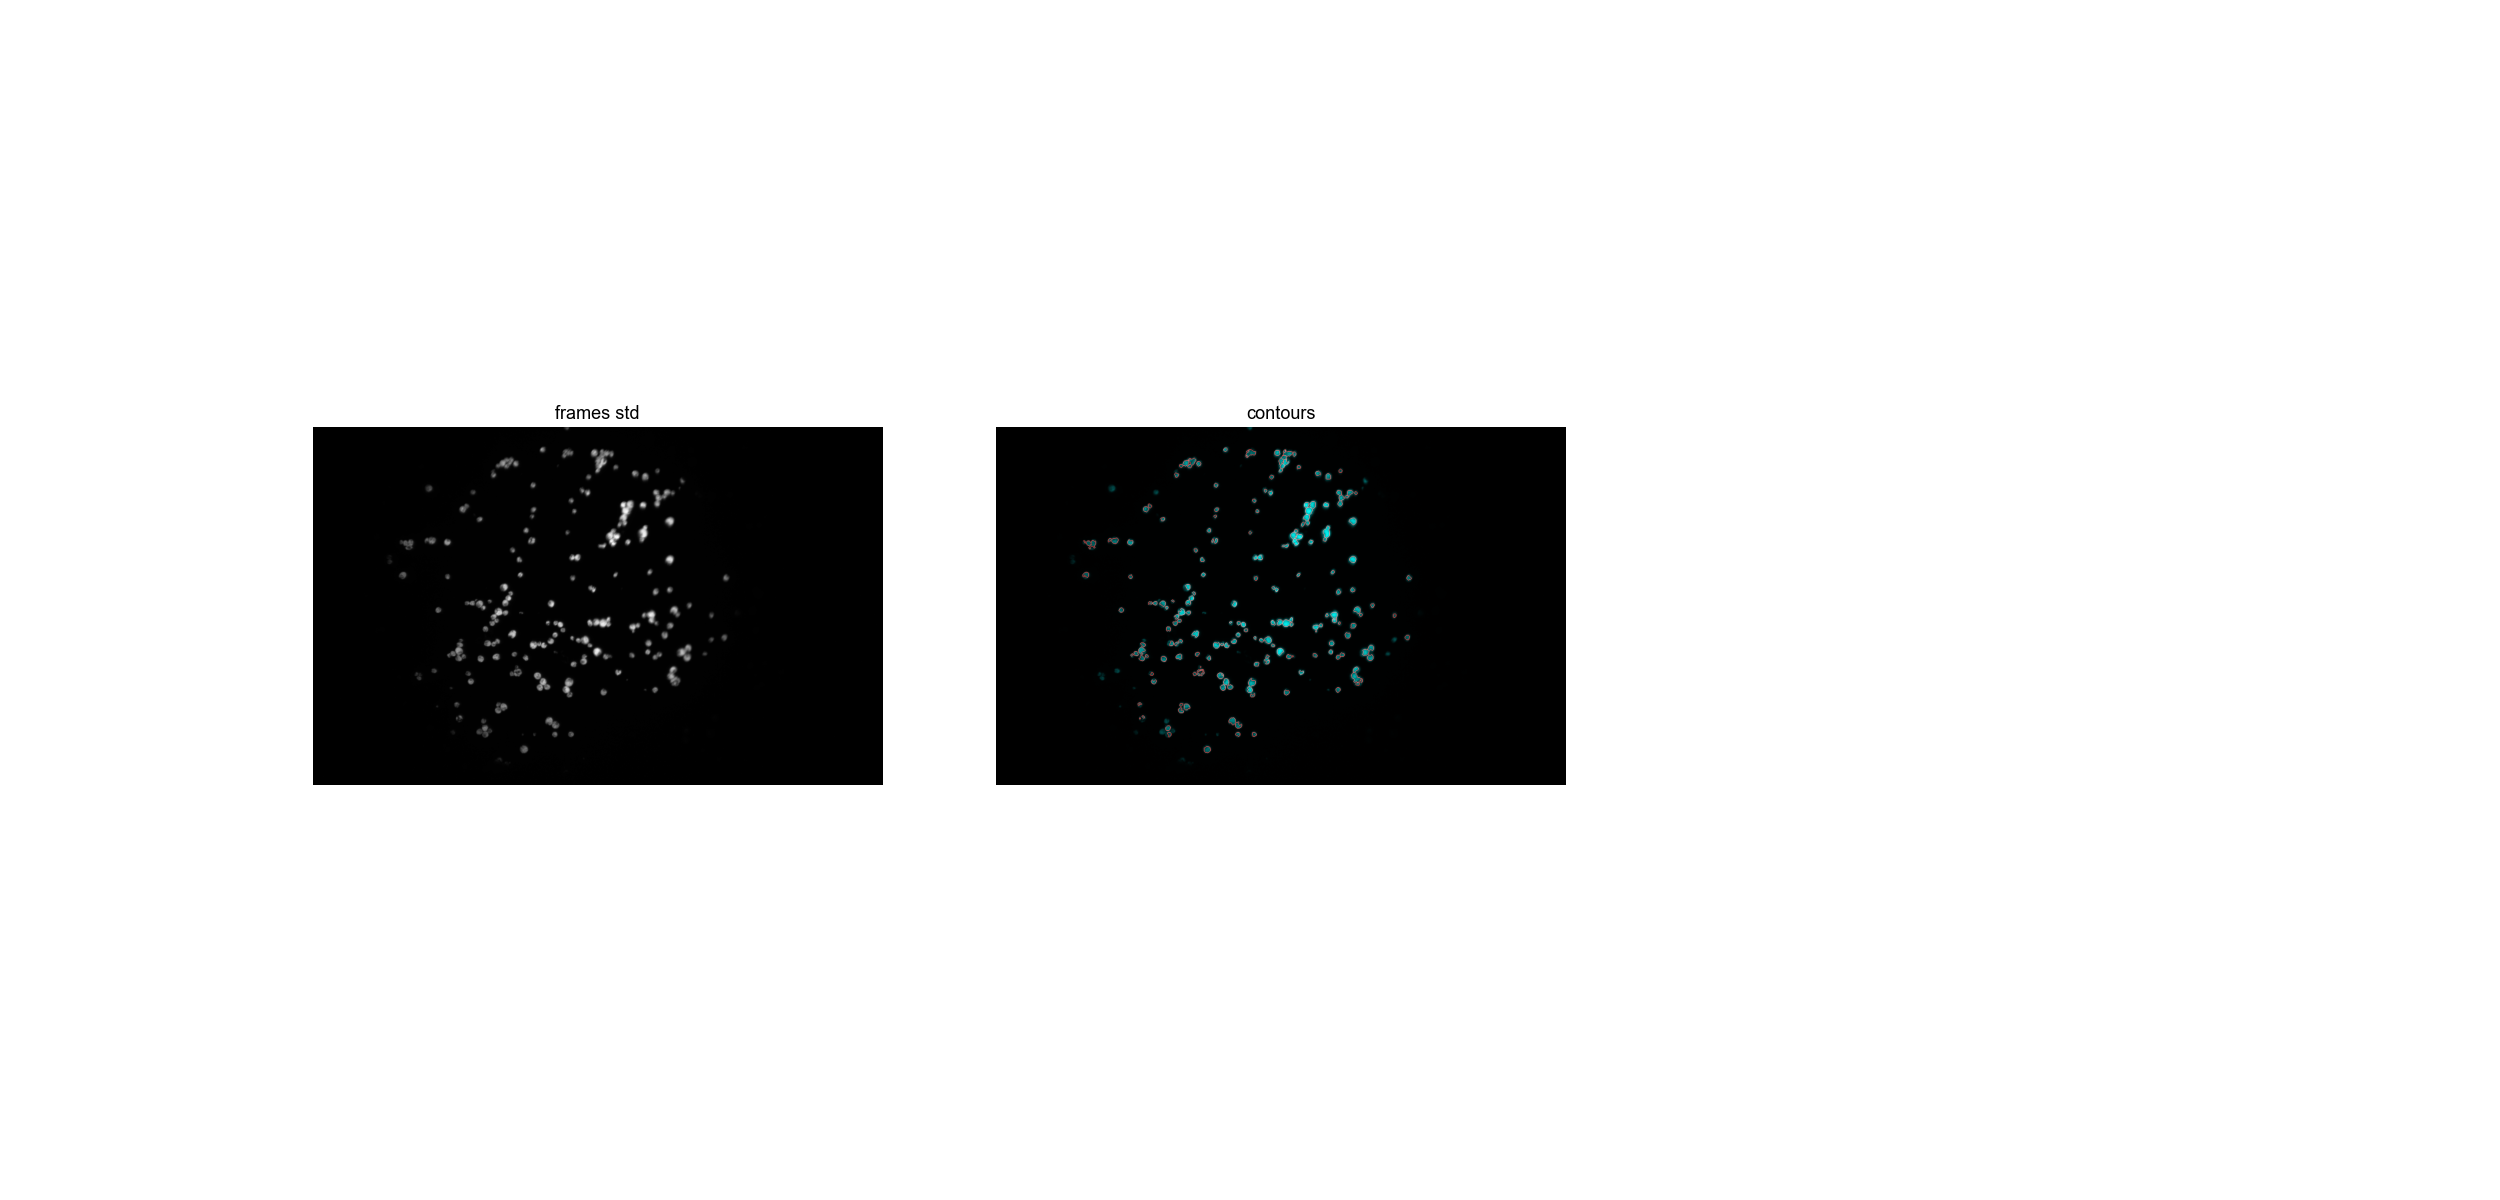

In [55]:
a = exp.artifacts[keys[7]].render()
a

## get curves

In [56]:
exp.metrics.keys()


dict_keys(['Measure pulse', 'Fluorescence', 'MPPC', 'fluo_trace'])

<AxesSubplot:xlabel='step'>

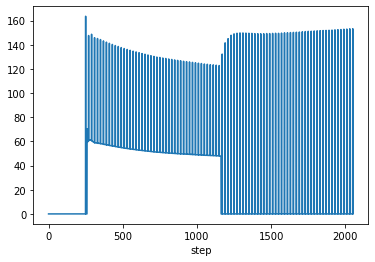

In [57]:
exp.metrics['fluo_trace'].plot()


In [58]:
exp.metrics['fluo_trace']

step
0         0.023612
1         0.023065
2         0.023247
3         0.025344
4         0.024797
           ...    
2047      0.047133
2048      0.041389
2049      0.045492
2050    153.320996
2051      0.045127
Name: fluo_trace, Length: 2052, dtype: float64